In [3]:
def simulation(fixed, variable):
    infected = [fixed['initial infections']]
    new_infections = [fixed['initial infections']]
    total_infections = fixed['initial infections']

    for t in range(fixed['duration']):
        cured_infections = infected[-1]

        if len(new_infections) > fixed['days_spreading']:
            cured_infections -= new_infections[-fixed['days_spreading']-1]
       
        if t >= variable['red_start'] and t < variable['red_end']:
            daily_contacts = variable['red_daily_contacts']
        else:
            daily_contacts = fixed['init_contacts']
        
        total_contacts = cured_infections * daily_contacts
        susceptible = fixed['pop'] - total_infections
        risky_contacts = total_contacts * (susceptible / fixed['pop'])
        newly_infected = round(risky_contacts * fixed['contagiousness'])

        new_infections.append(newly_infected)
        total_infections += newly_infected
        infected.append(cured_infections + newly_infected)
    
    return infected


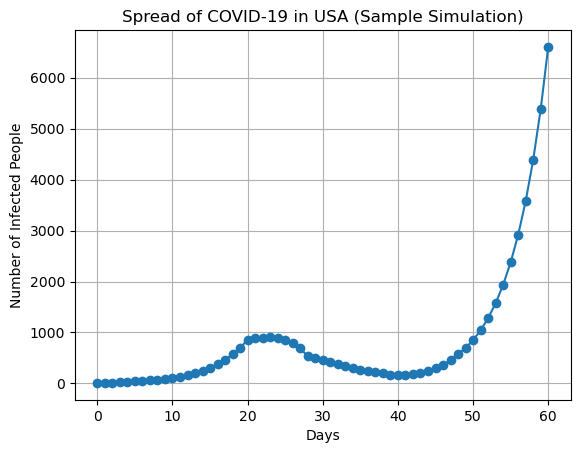

In [5]:
import matplotlib.pyplot as plt

def covid_spread(fixed, variable):
    infected = [fixed['initial infections']]
    new_infections = [fixed['initial infections']]
    total_infections = fixed['initial infections']

    for t in range(fixed['duration']):
        cured_infections = infected[-1]

        if len(new_infections) > fixed['days_spreading']:
            cured_infections -= new_infections[-fixed['days_spreading']-1]
       
        if t >= variable['lockdown_start'] and t < variable['lockdown_end']:
            daily_contacts = variable['lockdown_contacts']
        else:
            daily_contacts = fixed['init_contacts']
        
        total_contacts = cured_infections * daily_contacts
        susceptible = fixed['pop'] - total_infections
        risky_contacts = total_contacts * (susceptible / fixed['pop'])
        newly_infected = round(risky_contacts * fixed['contagiousness'])

        new_infections.append(newly_infected)
        total_infections += newly_infected
        infected.append(cured_infections + newly_infected)
    
    return infected

# Setup the fixed and variable values
fixed = {
    'pop': 1000000,  # Total population
    'initial infections': 10,  # Starting infections
    'init_contacts': 10,  # Contacts per day initially
    'contagiousness': 0.03,  # Chance of infection per contact
    'days_spreading': 7,  # Number of days a person is contagious
    'duration': 60  # Number of days to simulate
}

variable = {
    'lockdown_start': 20,  # When lockdown starts
    'lockdown_end': 40,  # When lockdown ends
    'lockdown_contacts': 3  # Contacts per day during lockdown
}

# Run the simulation
infected = covid_spread(fixed, variable)

# Plot the results
days = list(range(len(infected)))

plt.plot(days, infected, marker='o')
plt.xlabel('Days')
plt.ylabel('Number of Infected People')
plt.title('Spread of COVID-19 in USA (Sample Simulation)')
plt.grid(True)
plt.show()
